<a href="https://colab.research.google.com/github/uditsaini1111/Credit-Risk-Ptediction/blob/main/creditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/german_credit_data.csv')

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [5]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [6]:
df.drop('Unnamed: 0',axis=1, inplace = True)

In [7]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [8]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

In [9]:

df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [11]:
for i in ['Sex', 'Housing',	'Saving accounts', 'Checking account', 'Purpose']:
  print(f"\nColumn: {i}")
  print(df[i].value_counts())


Column: Sex
Sex
male      690
female    310
Name: count, dtype: int64

Column: Housing
Housing
own     713
rent    179
free    108
Name: count, dtype: int64

Column: Saving accounts
Saving accounts
little        603
unknown       183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

Column: Checking account
Checking account
unknown     394
little      274
moderate    269
rich         63
Name: count, dtype: int64

Column: Purpose
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


In [12]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


<Axes: >

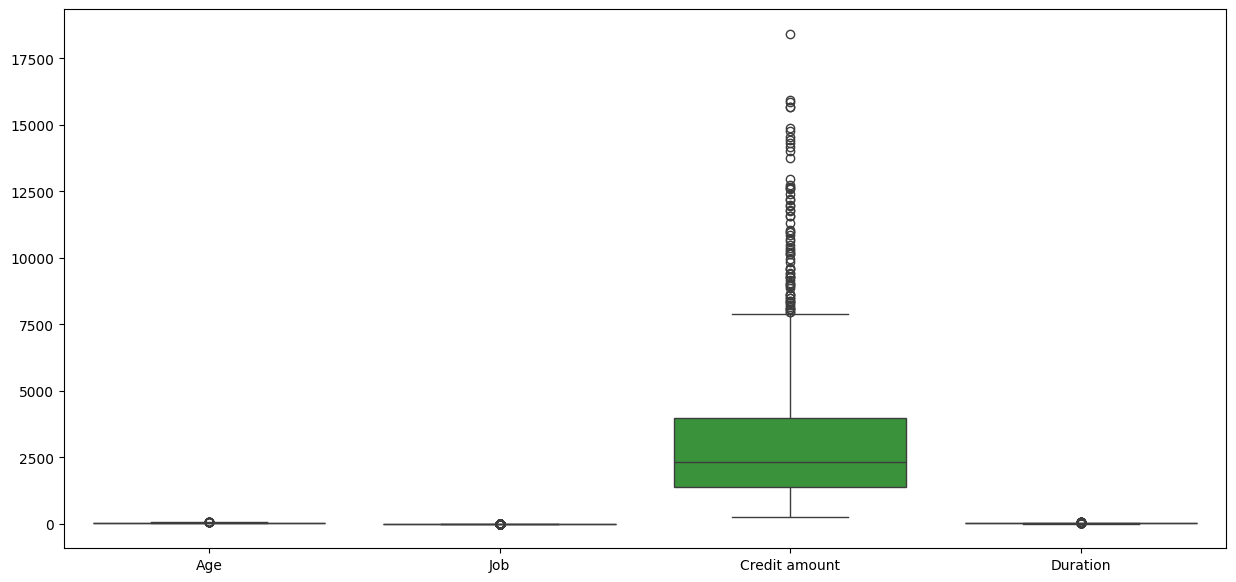

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df)

/tmp/ipython-input-1437508435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit amount'])


<Axes: xlabel='Credit amount', ylabel='Density'>

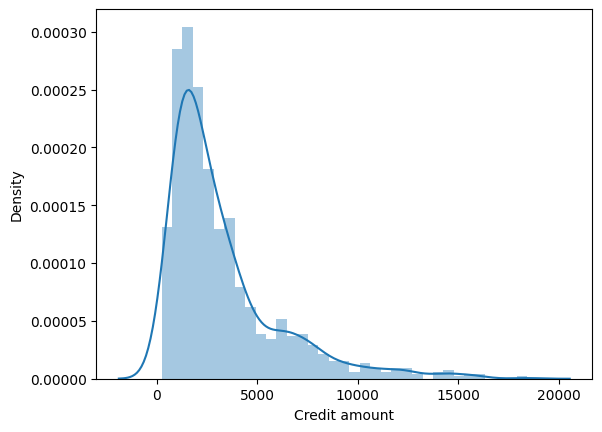

In [14]:
sns.distplot(df['Credit amount'])

In [15]:
df=df[(df['Credit amount'])<(df['Credit amount'].quantile(.95))]

/tmp/ipython-input-1437508435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit amount'])


<Axes: xlabel='Credit amount', ylabel='Density'>

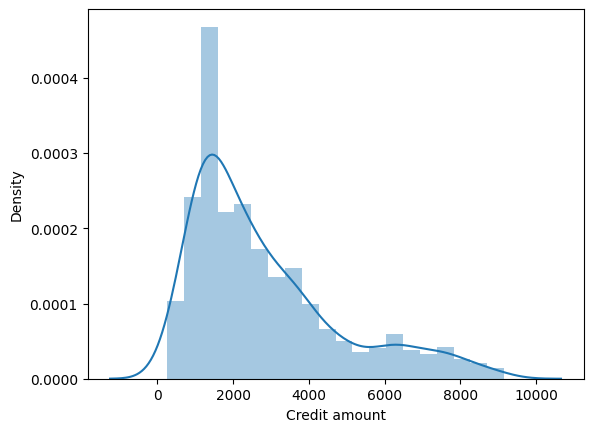

In [16]:
sns.distplot(df['Credit amount'])

<Axes: >

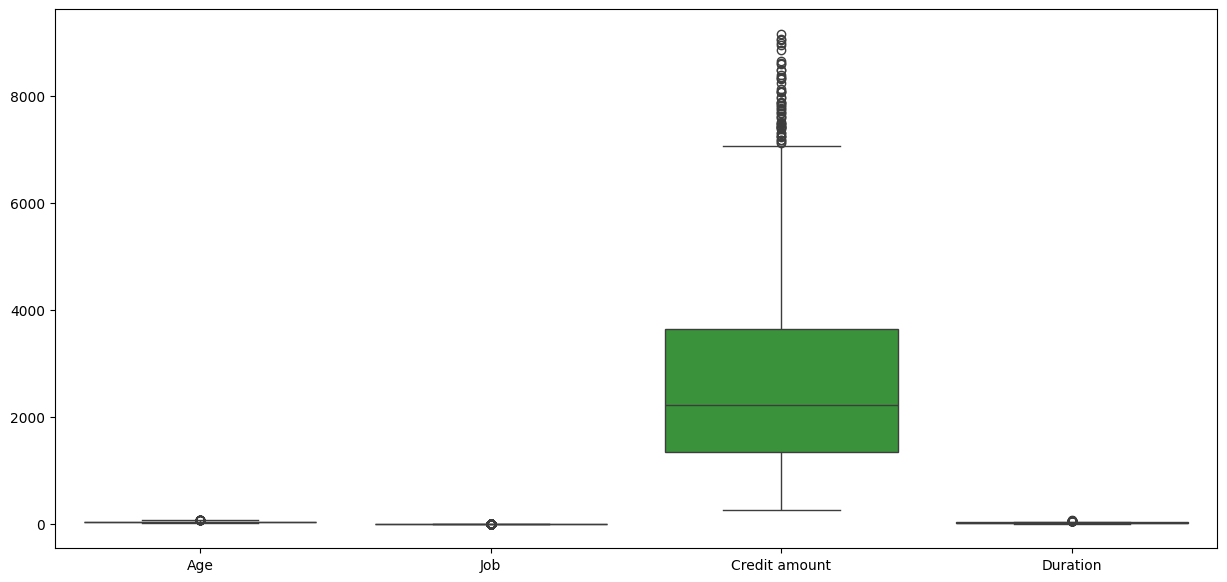

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df)

In [18]:


df.shape

(950, 9)

In [19]:
def target(row):
    f = 0

    if (row['Credit amount']>5000) & (row['Credit amount']<=8000):
        f += 1
    elif row['Credit amount']>8000:
        f += 2

    if row['Duration']>45:
      f+=1

    if row['Job'] <= 1:
      f+=1

    if (row['Age']<=22) & (row['Age']>=65):
      f+=1

    if row['Housing']=='rent':
        f+=1

    if row['Saving accounts'] in ['little', 'unknown']:
      f+=2
    elif row['Saving accounts'] in ['moderate']:
      f+=1

    if row['Checking account'] in ['little', 'unknown']:
      f+=1

    return 1 if f >=4 else 0


df['Risk']=df.apply(target,axis=1)

df['Risk'].value_counts()

/tmp/ipython-input-2179646992.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk']=df.apply(target,axis=1)


,count
Risk,
0,663
1,287


In [20]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,unknown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,unknown,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,0



Column: Sex

Column: Housing

Column: Saving accounts

Column: Checking account

Column: Purpose


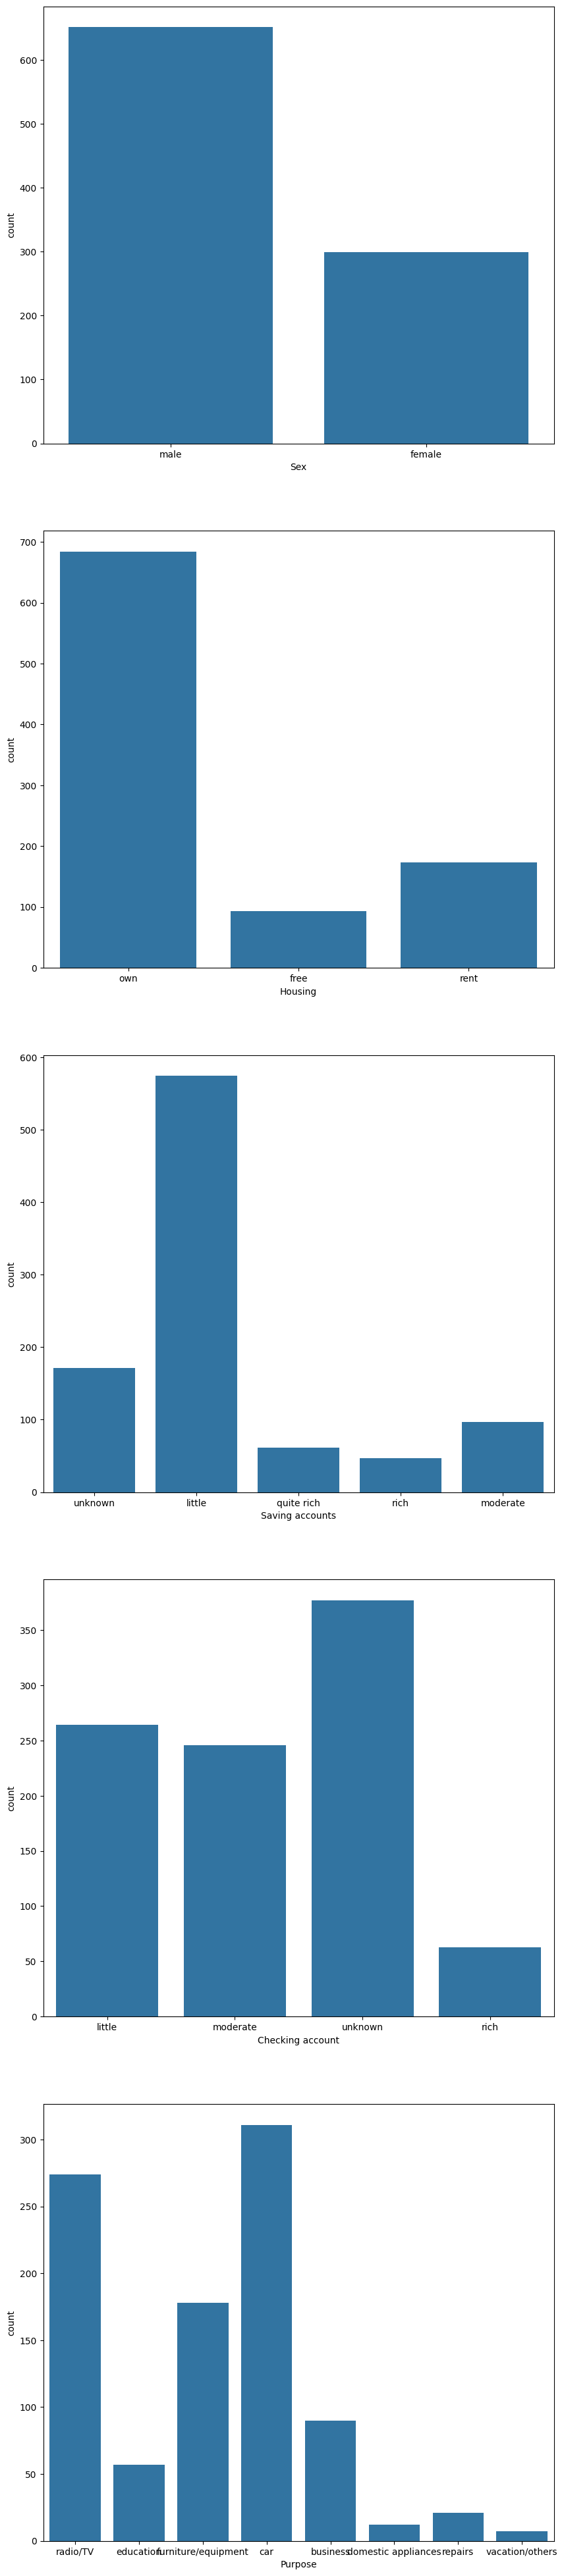

In [21]:
fig, axs = plt.subplots(5,1,figsize=(10,50))
for idx, i in enumerate(['Sex', 'Housing',	'Saving accounts', 'Checking account', 'Purpose']):


  print(f"\nColumn: {i}")
  sns.countplot(x=i, data=df, ax=axs[idx])


In [22]:
!pip install dython

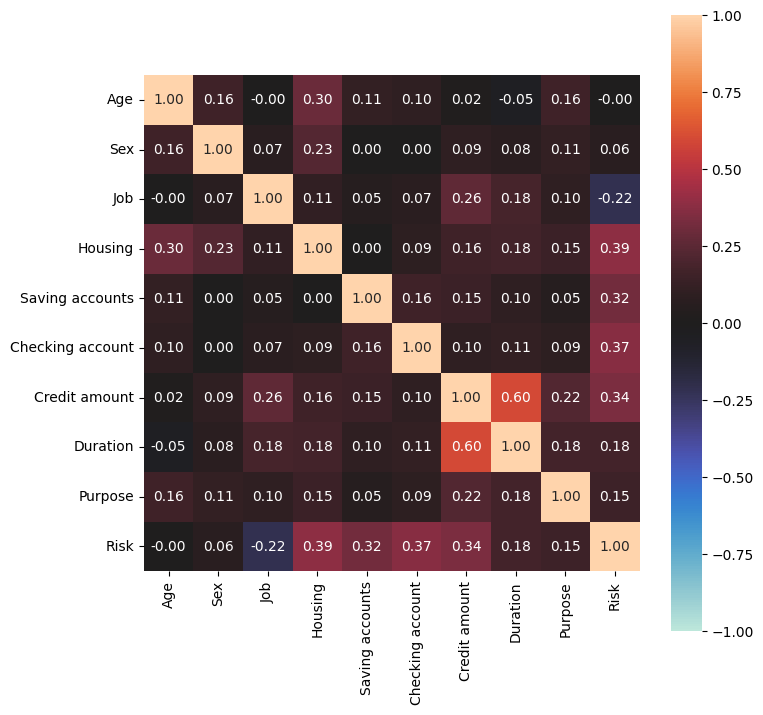

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,1.000000,0.160993,-0.004845,0.296837,0.114597,0.099719,0.021170,-0.046659,0.161011,-0.001152
Sex,0.160993,1.000000,0.069794,0.231684,0.000000,0.000000,0.093778,0.076348,0.111999,0.062545
Job,-0.004845,0.069794,1.000000,0.105988,0.051566,0.072230,0.264039,0.183628,0.099044,-0.218618
Housing,0.296837,0.231684,0.105988,1.000000,0.000000,0.093118,0.163927,0.176996,0.148367,0.387428
Saving accounts,0.114597,0.000000,0.051566,0.000000,1.000000,0.158627,0.145577,0.101293,0.053333,0.315802
Checking account,0.099719,0.000000,0.072230,0.093118,0.158627,1.000000,0.096303,0.110075,0.093598,0.374681
Credit amount,0.021170,0.093778,0.264039,0.163927,0.145577,0.096303,1.000000,0.597315,0.223505,0.336061
Duration,-0.046659,0.076348,0.183628,0.176996,0.101293,0.110075,0.597315,1.000000,0.179523,0.177477
Purpose,0.161011,0.111999,0.099044,0.148367,0.053333,0.093598,0.223505,0.179523,1.000000,0.154838
Risk,-0.001152,0.062545,-0.218618,0.387428,0.315802,0.374681,0.336061,0.177477,0.154838,1.000000


In [23]:
from dython.nominal import associations
b=associations(df, figsize=(8,8))
a=b['corr']
a

In [24]:
a = a[(a>0.85) & (a!=1)]
a

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purpose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
x =df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [27]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [28]:
numeric_p=Pipeline(steps=[("scaler",StandardScaler())])
categorical_p=Pipeline(steps=[("encoder",OneHotEncoder())])

In [29]:
preprocessor = ColumnTransformer(transformers=[("num", numeric_p, ['Age','Job','Credit amount','Duration']),("cat", categorical_p, ['Sex', 'Housing',	'Saving accounts', 'Checking account', 'Purpose'])])

In [30]:
X_train_trans = preprocessor.fit_transform(x_train)
X_test_trans = preprocessor.transform(x_test)

feature_names = preprocessor.get_feature_names_out()


train__x = pd.DataFrame(X_train_trans, columns=feature_names)
test__x = pd.DataFrame(X_test_trans, columns=feature_names)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(train__x, y_train)

In [31]:
m1= XGBClassifier()

In [32]:
m2=LogisticRegression()

In [33]:
m1.fit(X_res,y_res)
m2.fit(X_res,y_res)

LogisticRegression()

In [34]:
p1=m1.predict(test__x)
p2=m2.predict(test__x)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p1))
print(classification_report(y_test, p2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       222
           1       0.96      1.00      0.98        92

    accuracy                           0.99       314
   macro avg       0.98      0.99      0.98       314
weighted avg       0.99      0.99      0.99       314

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       222
           1       0.79      0.93      0.86        92

    accuracy                           0.91       314
   macro avg       0.88      0.92      0.89       314
weighted avg       0.92      0.91      0.91       314



In [36]:
import pickle
pickle.dump(preprocessor, open("preprocessor_creditrisk.pkl", "wb"))
pickle.dump(m1, open("CreditRisk_prediction.pkl", "wb"))

In [37]:
'''from sklearn.inspection import permutation_importance
result = permutation_importance(m1, X_res, y_res, n_repeats=10, random_state=42)
importance = result.importances_mean

for col, imp in zip(x_train.columns, importance):
    print(f"{col}: {imp}")'''

'from sklearn.inspection import permutation_importance\nresult = permutation_importance(m1, X_res, y_res, n_repeats=10, random_state=42)\nimportance = result.importances_mean\n\nfor col, imp in zip(x_train.columns, importance):\n    print(f"{col}: {imp}")'

In [38]:
'''features = x_test.columns
idx = np.argsort(importance)
plt.figure(figsize=(10,6))
plt.barh(range(len(idx)), importance[idx], align="center")
plt.yticks(range(len(idx)), features[idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation Importance)")
plt.show()'''

'features = x_test.columns\nidx = np.argsort(importance)\nplt.figure(figsize=(10,6))\nplt.barh(range(len(idx)), importance[idx], align="center")\nplt.yticks(range(len(idx)), features[idx])\nplt.xlabel("Permutation Importance")\nplt.title("Feature Importance (Permutation Importance)")\nplt.show()'

In [39]:
pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR